# Cohort summary

In [1]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress,norm
import tabix
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [4]:
pd.set_option('display.max_columns', None)

# Define gene order and plot and data directories

In [5]:
plots_dir = "./plots"
data_dir = "./data"

# Load all methods data

In [6]:
gene_order = gene_order_omega_truncating_decreasing_males

In [7]:
sampleee = 'all_samples'

### OncodriveFML

In [8]:
oncodrivefml_file = f"{deepcsa_run_dir}/oncodrivefmlsnvs/{sampleee}.all/{sampleee}-oncodrivefml.tsv.gz"
oncodrivefml_data = pd.read_table(oncodrivefml_file)
oncodrivefml_data = oncodrivefml_data[["GENE_ID", "Z-SCORE", "Q_VALUE", "AVG_SCORE_OBS", "POPULATION_MEAN", "STD_OF_MEANS"]]
oncodrivefml_data.columns = ["GENE", "OncodriveFML", "pvalue", "OBSERVED_MEAN", "BACKGROUND_MEAN", "BACKGROUND_STD"]
oncodrivefml_data = oncodrivefml_data[oncodrivefml_data["GENE"].isin(gene_order)].reset_index(drop = True)
oncodrivefml_data

,GENE,OncodriveFML,pvalue,OBSERVED_MEAN,BACKGROUND_MEAN,BACKGROUND_STD
0,KMT2D,116.91111,0.000002,28.524873,17.858353,0.091236
1,CDKN1A,17.20629,0.000002,25.426853,17.440536,0.464151
2,FOXQ1,14.25517,0.000002,22.483544,17.378453,0.358122
3,TP53,17.78687,0.000002,22.972463,16.015025,0.391156
4,STAG2,33.73839,0.000002,28.562044,21.385136,0.212722
5,NOTCH2,21.78539,0.000002,24.320363,19.585340,0.217349
6,KMT2C,8.85581,0.000002,20.644284,17.642908,0.338916
7,EP300,27.27174,0.000002,25.510418,20.545498,0.182054
8,KDM6A,59.57240,0.000002,30.010200,20.264074,0.163601
9,RBM10,62.26885,0.000002,30.204619,19.490484,0.172063


### Omega

In [9]:
omega_file = f"{deepcsa_run_dir}/omega/output_mle.{sampleee}.tsv"
omega_data = pd.read_table(omega_file)
omega_data = omega_data[omega_data["impact"].isin(['missense', 'truncating'])]
omega_data = omega_data[omega_data["gene"].isin(gene_order)].reset_index(drop = True)
omega_data.head(10)

,gene,sample,impact,mutations,dnds,pvalue,lower,upper
0,CREBBP,all_samples,missense,1630,2.786035,0.0,2.555603,3.038110
1,CREBBP,all_samples,truncating,400,5.152344,0.0,4.436107,5.979370
2,ARID1A,all_samples,missense,1234,1.528125,0.0,1.393955,1.676440
3,ARID1A,all_samples,truncating,1850,15.885156,0.0,14.205010,17.779688
4,CDKN1A,all_samples,missense,239,2.403125,0.0,2.054907,2.803516
5,CDKN1A,all_samples,truncating,193,14.077344,0.0,11.638054,16.976514
6,KMT2C,all_samples,missense,564,1.416797,0.0,1.264989,1.586475
7,KMT2C,all_samples,truncating,163,2.973047,0.0,2.401561,3.664575
8,TP53,all_samples,missense,559,5.210742,0.0,4.648260,5.833911
9,TP53,all_samples,truncating,68,4.061719,0.0,3.082421,5.275708


In [10]:
omega_truncating = omega_data[omega_data["impact"] == "truncating"].reset_index(drop = True)[["gene", "dnds", "pvalue", "lower", "upper"]]
omega_truncating.columns = ["GENE", "omega_trunc", "pvalue", "lower", "upper"]


omega_missense = omega_data[omega_data["impact"] == "missense"].reset_index(drop = True)[["gene", "dnds", "pvalue", "lower", "upper"]]
omega_missense.columns = ["GENE", "omega_mis", "pvalue", "lower", "upper"]
omega_missense

,GENE,omega_mis,pvalue,lower,upper
0,CREBBP,2.786035,0.000000,2.555603,3.038110
1,ARID1A,1.528125,0.000000,1.393955,1.676440
2,CDKN1A,2.403125,0.000000,2.054907,2.803516
3,KMT2C,1.416797,0.000000,1.264989,1.586475
4,TP53,5.210742,0.000000,4.648260,5.833911
5,RBM10,3.303516,0.000000,2.990728,3.648364
6,NOTCH2,2.533594,0.000000,2.319187,2.769189
7,STAG2,1.763257,0.000000,1.577487,1.969556
8,RB1,1.718750,0.000000,1.473451,1.997681
9,FGFR3,0.881250,0.208065,0.718741,1.071069


### Define gene order based on omega trunc

In [11]:
gene_order = list(omega_truncating.sort_values("omega_trunc", ascending= False)["GENE"].values)

### Oncodrive3D

In [13]:
oncodrive3d_file = f"{deepcsa_run_dir}/oncodrive3d/run/{sampleee}/{sampleee}.3d_clustering_genes.csv"
oncodrive3d_data = pd.read_table(oncodrive3d_file, sep = ',')
oncodrive3d_data.head()

,Gene,Ens_Gene_ID,Uniprot_ID,pval,qval,C_gene,C_pos,C_label,Score_obs_sim_top_vol,Clust_res,Mut_in_gene,Clust_mut,Mut_in_top_vol,Mut_in_top_cl_vol,PAE_top_vol,pLDDT_top_vol,pLDDT_top_cl_vol,Ratio_not_in_structure,Ratio_WT_mismatch,Mut_zero_mut_prob,Pos_zero_mut_prob,Ratio_mut_zero_prob,Cancer,Cohort,Transcript_ID,O3D_transcript_ID,Transcript_status,Status
0,CREBBP,ENSG00000005339,Q92793,0.0,0.0,1,[1437 1433 1436 1409 1435 1475 1482 1484 1483 ...,[ 0. 1. 0. 0. 0. 2. 1. 0. 1. 0. 0. ...,76.612860,217.0,1630,1027.0,282.0,476.0,2.958333,98.406975,97.686836,0.0,0.0,0.0,NaN,NaN,NaN,all_samples,ENST00000262367,ENST00000262367,Match,Processed
1,EP300,ENSG00000100393,Q09472,0.0,0.0,1,[1400 1375 1373 1439 1397 1399 1448 1446 1374 ...,[ 0. 0. 0. 1. 2. 2. 3. 2. 0. 4. 4. ...,75.119600,237.0,1911,1182.0,280.0,432.0,4.437500,98.501976,97.167343,0.0,0.0,0.0,NaN,NaN,NaN,all_samples,ENST00000263253,ENST00000263253,Match,Processed
2,RBM10,ENSG00000182872,P98175,0.0,0.0,1,[777 778 764 761 784 781 774 775 763 762 779 7...,[ 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. ...,47.779285,127.0,934,604.0,202.0,234.0,5.600000,92.955475,91.895271,0.0,0.0,0.0,NaN,NaN,NaN,all_samples,ENST00000377604,ENST00000377604,Match,Processed
3,KMT2D,ENSG00000167548,O14686,0.0,0.0,1,[5050 1404 5473 5046 5508 5062 1380 5337 1385 ...,[ 0. 1. 2. 0. 2. 0. 1. 2. 1. 0. 3. ...,29.098787,580.0,4093,2127.0,173.0,350.0,NaN,98.024124,97.625877,0.0,0.0,0.0,NaN,NaN,NaN,all_samples,ENST00000301067,ENST00000301067,Match,Processed
4,TP53,ENSG00000141510,P04637,0.0,0.0,1,[239 245 240 242 241 249 274 273 246 248 251 2...,[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 2. 0. 0. 0. ...,19.328331,129.0,559,475.0,132.0,310.0,3.260870,98.187431,97.382248,0.0,0.0,0.0,NaN,NaN,NaN,all_samples,ENST00000269305,ENST00000269305,Match,Processed


In [14]:
oncodrive3d_data_scores = oncodrive3d_data[["Gene", "Score_obs_sim_top_vol", "qval"]]
oncodrive3d_data_scores.columns = ["GENE", "Oncodrive3D", 'pvalue']
oncodrive3d_data_scores = oncodrive3d_data_scores[oncodrive3d_data_scores["GENE"].isin(gene_order)].reset_index(drop = True)
oncodrive3d_data_scores

,GENE,Oncodrive3D,pvalue
0,CREBBP,76.612860,0.00000
1,EP300,75.119600,0.00000
2,RBM10,47.779285,0.00000
3,KMT2D,29.098787,0.00000
4,TP53,19.328331,0.00000
5,KDM6A,17.171063,0.00000
6,FOXQ1,17.125856,0.00000
7,CDKN1A,14.086455,0.00000
8,NOTCH2,9.585122,0.00000
9,ARID1A,7.495654,0.00000


### Indels

In [15]:
indels_file = f"{deepcsa_run_dir}/indels/{sampleee}.sample.indels.tsv"
indels_data = pd.read_table(indels_file)
indels_data.head()

,SYMBOL,NOT_MULTIPLE_3.non_protein_affecting,MULTIPLE_3.non_protein_affecting,TRUNCATING.protein_affecting,NON_TRUNCATING.protein_affecting,Npa_NM3/M3,pa_TRUNC/NOTTRUNC,pa/Npa,g_test_score,pvalue
0,-,1,0,0,0,inf,-1.000000,1.000000,0.000000,1.000000e+00
1,ARID1A,103,43,2249,91,2.395349,24.714286,10.317614,1022.352756,2.486770e-224
2,BAGE2,17,3,0,0,5.666667,-1.000000,1.000000,0.000000,1.000000e+00
3,BMP2K,0,0,0,4,-1.000000,0.000000,1.000000,NaN,NaN
4,CDKN1A,27,6,606,27,4.500000,22.444444,4.987654,112.087459,3.418907e-26


In [16]:
indels_panel_df = indels_data[["SYMBOL", "pa/Npa", "pvalue"]]
indels_panel_df.columns = ["GENE", "Indels_score", "pvalue"]
indels_panel_df = indels_panel_df[indels_panel_df["GENE"].isin(gene_order)].reset_index(drop = True)
indels_panel_df

,GENE,Indels_score,pvalue
0,ARID1A,10.317614,2.486770e-224
1,CDKN1A,4.987654,3.418907e-26
2,CREBBP,0.854365,1.401530e-01
3,EP300,1.022767,8.056205e-01
4,FGFR3,0.095960,1.651209e-06
5,FOXQ1,0.763825,6.223686e-02
6,KDM6A,7.246968,2.612781e-147
7,KMT2C,1.585950,3.698316e-04
8,KMT2D,4.730688,9.355371e-152
9,NOTCH2,2.896420,3.864740e-20


In [17]:
all_metrics_table = omega_missense.merge(
    omega_truncating, on = 'GENE', suffixes = ('', '_omega_trunc')).merge(
    oncodrivefml_data, on = 'GENE', suffixes = ('', '_oncodrivefml')).merge(
    oncodrive3d_data_scores, on = 'GENE', suffixes = ('', '_oncodrive3d')).merge(
    indels_panel_df, on = 'GENE', suffixes = ('', '_frameshift_enrich'))

all_metrics_table.head()

,GENE,omega_mis,pvalue,lower,upper,omega_trunc,pvalue_omega_trunc,lower_omega_trunc,upper_omega_trunc,OncodriveFML,pvalue_oncodrivefml,OBSERVED_MEAN,BACKGROUND_MEAN,BACKGROUND_STD,Oncodrive3D,pvalue_oncodrive3d,Indels_score,pvalue_frameshift_enrich
0,CREBBP,2.786035,0.0,2.555603,3.038110,5.152344,0.0,4.436107,5.979370,19.26229,0.000002,24.359345,20.292481,0.211131,76.612860,0.0,0.854365,1.401530e-01
1,ARID1A,1.528125,0.0,1.393955,1.676440,15.885156,0.0,14.205010,17.779688,56.41793,0.000002,30.154249,21.391168,0.155324,7.495654,0.0,10.317614,2.486770e-224
2,CDKN1A,2.403125,0.0,2.054907,2.803516,14.077344,0.0,11.638054,16.976514,17.20629,0.000002,25.426853,17.440536,0.464151,14.086455,0.0,4.987654,3.418907e-26
3,KMT2C,1.416797,0.0,1.264989,1.586475,2.973047,0.0,2.401561,3.664575,8.85581,0.000002,20.644284,17.642908,0.338916,2.591948,0.0,1.585950,3.698316e-04
4,TP53,5.210742,0.0,4.648260,5.833911,4.061719,0.0,3.082421,5.275708,17.78687,0.000002,22.972463,16.015025,0.391156,19.328331,0.0,2.160494,1.582071e-02


In [18]:
all_metrics_table = all_metrics_table[['GENE',
                                       'omega_mis', 'pvalue',
                                       'omega_trunc', 'pvalue_omega_trunc',
                                       'OncodriveFML', 'pvalue_oncodrivefml',
                                       'Oncodrive3D', 'pvalue_oncodrive3d',
                                       'Indels_score', 'pvalue_frameshift_enrich']]
all_metrics_table.columns = ['GENE',
                                       'omega_mis', 'pvalue_omega_mis',
                                       'omega_trunc', 'pvalue_omega_trunc',
                                       'OncodriveFML', 'pvalue_oncodrivefml',
                                       'Oncodrive3D', 'pvalue_oncodrive3d',
                                       'Frameshift_enrich_score', 'pvalue_frameshift_enrich']
all_metrics_table

,GENE,omega_mis,pvalue_omega_mis,omega_trunc,pvalue_omega_trunc,OncodriveFML,pvalue_oncodrivefml,Oncodrive3D,pvalue_oncodrive3d,Frameshift_enrich_score,pvalue_frameshift_enrich
0,CREBBP,2.786035,0.000000,5.152344,0.000000e+00,19.26229,0.000002,76.612860,0.00000,0.854365,1.401530e-01
1,ARID1A,1.528125,0.000000,15.885156,0.000000e+00,56.41793,0.000002,7.495654,0.00000,10.317614,2.486770e-224
2,CDKN1A,2.403125,0.000000,14.077344,0.000000e+00,17.20629,0.000002,14.086455,0.00000,4.987654,3.418907e-26
3,KMT2C,1.416797,0.000000,2.973047,0.000000e+00,8.85581,0.000002,2.591948,0.00000,1.585950,3.698316e-04
4,TP53,5.210742,0.000000,4.061719,0.000000e+00,17.78687,0.000002,19.328331,0.00000,2.160494,1.582071e-02
5,RBM10,3.303516,0.000000,38.896875,0.000000e+00,62.26885,0.000002,47.779285,0.00000,3.826962,1.575888e-30
6,NOTCH2,2.533594,0.000000,5.106152,0.000000e+00,21.78539,0.000002,9.585122,0.00000,2.896420,3.864740e-20
7,STAG2,1.763257,0.000000,15.321777,0.000000e+00,33.73839,0.000002,5.728779,0.00000,4.666667,4.798255e-39
8,RB1,1.718750,0.000000,2.387500,5.960465e-08,3.85516,0.000138,1.967891,0.00156,2.177143,3.043465e-04
9,FGFR3,0.881250,0.208065,0.298837,1.023352e-03,-2.34196,1.000000,3.190917,0.00000,0.095960,1.651209e-06


# Plot all together

In [19]:
pvalue_thres = 0.05

In [20]:
# omega_truncating, omega_missense
max_size_omega = 20
max_trunc = omega_truncating['omega_trunc'].max()
max_mis = omega_missense['omega_mis'].max()
max_indels = indels_panel_df['Indels_score'].max()
trunc_size = max_size_omega * (max_trunc/(max_trunc + max_mis))
mis_size = max_size_omega - trunc_size
indel_size = trunc_size / max_trunc * max_indels

In [21]:
max_trunc = max_trunc * 1.02
max_mis = max_mis * 1.02
max_indels = max_indels * 1.02

In [22]:
max_trunc, max_mis, max_indels

(np.float64(42.95475000000008),
 np.float64(5.314957031250009),
 np.float64(10.523966712898757))

/home/fcalvet/miniforge3/envs/notebooks_env/lib/python3.10/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/fcalvet/miniforge3/envs/notebooks_env/lib/python3.10/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


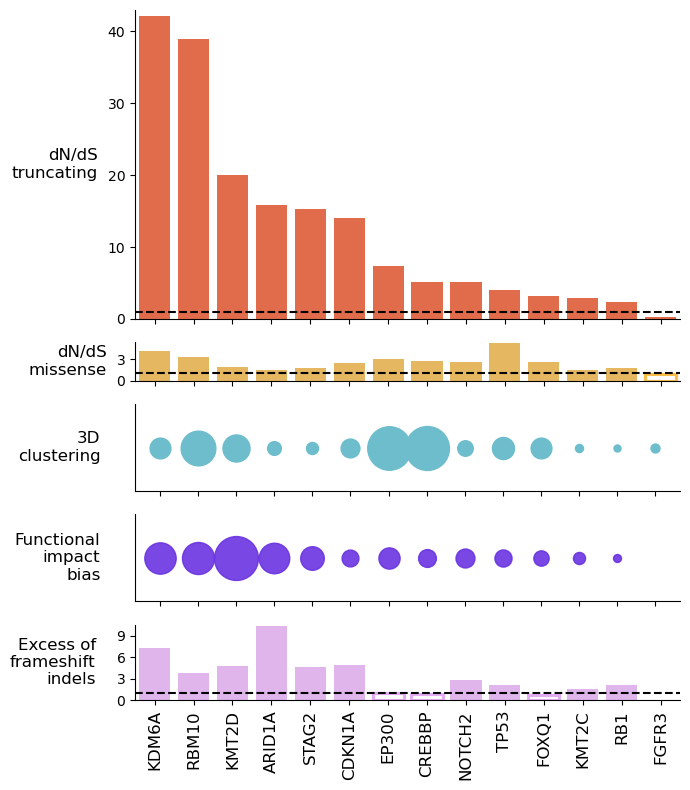

In [24]:
# List of dataframes
dataframes = [#("frameshift", indels_panel_df),
              ("o3d_score", oncodrive3d_data_scores),
              ("ofml_score", oncodrivefml_data)]

# Concatenate dataframes to get unique genes
# all_genes = pd.concat(dataframes)['GENE'].unique()
num_dfs = len(dataframes)

# Create the figure and subplots
fig, (ax1, ax2, ax4, ax0, ax3) = plt.subplots(5, 1, figsize=(7, 8), gridspec_kw={'height_ratios': [trunc_size, mis_size, 5, 5, indel_size]})


# Separate data based on significance of p-value
omega_truncating_sig = omega_truncating[omega_truncating["pvalue"] <= pvalue_thres].reset_index(drop = True)
omega_truncating_notsig = omega_truncating[omega_truncating["pvalue"] > pvalue_thres].reset_index(drop = True)

# Plot the second bar plot in the middle subplot
sns.barplot(data=omega_truncating_notsig, x='GENE', y='omega_trunc',
            ax=ax1, alpha=1,
            fill = False,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["omega_trunc"])


# Plot the second bar plot in the middle subplot
sns.barplot(data=omega_truncating_sig, x='GENE', y='omega_trunc',
            ax=ax1, alpha=1,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["omega_trunc"],
            edgecolor = None
           )



for i, genee in enumerate(gene_order):
    truncating_dnds = omega_truncating[omega_truncating["GENE"] == genee]['omega_trunc'].values[0]
    truncating_lower = omega_truncating[omega_truncating["GENE"] == genee]['lower'].values[0]
    truncating_upper = omega_truncating[omega_truncating["GENE"] == genee]['upper'].values[0]
#    ax1.errorbar(i, truncating_dnds,
#                yerr=[[truncating_dnds - truncating_lower], [truncating_upper - truncating_dnds]],
#                fmt='none', ecolor='black', fillstyle = 'none',
#                 barsabove = True)

    
ax1.set_xlabel('')
ax1.set_ylabel('dN/dS\ntruncating', fontsize = 12, rotation = 0, labelpad=7, verticalalignment = 'center',
               horizontalalignment = 'right')
# ax1.set_yticks([0,5,10,15, 20, 25, 30, 35])
ax1.set_yticks([0,10,20,30,40,50])
ax1.set_yticklabels([0,10,20,30,40,50])
# ax1.set_yticklabels([0,5,10,15, 20, 25, 30, 35])
ax1.set_xticklabels([])  # Hide x-axis labels on the middle plot
ax1.axhline(1, color='black', linestyle='--')
ax1.set_ylim(0, max_trunc)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)




# Separate data based on significance of p-value
omega_missense_sig = omega_missense[omega_missense["pvalue"] <= pvalue_thres].reset_index(drop = True)
omega_missense_notsig = omega_missense[omega_missense["pvalue"] > pvalue_thres].reset_index(drop = True)

# Plot the second bar plot in the middle subplot
sns.barplot(data=omega_missense_notsig, x='GENE', y='omega_mis',
            ax=ax2, alpha=1,
            fill = False,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["omega_miss"])


# Plot the second bar plot in the middle subplot
sns.barplot(data=omega_missense_sig, x='GENE', y='omega_mis',
            ax=ax2, alpha=1,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["omega_miss"],
            edgecolor = None
           )

for i, genee in enumerate(gene_order):
    missense_dnds = omega_missense[omega_missense["GENE"] == genee]['omega_mis'].values[0]
    missense_lower = omega_missense[omega_missense["GENE"] == genee]['lower'].values[0]
    missense_upper = omega_missense[omega_missense["GENE"] == genee]['upper'].values[0]
#    ax2.errorbar(i, truncating_dnds,
#                yerr=[[missense_dnds - missense_lower], [missense_upper - missense_dnds]],
#                fmt='none', ecolor='black', fillstyle = 'none',
#                 barsabove = True)

# ax1.set_title('Bar plot of Indels_score (Dataframe 1)')
ax2.set_xlabel('')
ax2.set_ylabel('dN/dS\nmissense', fontsize = 12, rotation = 0, labelpad=7, verticalalignment = 'center',
               horizontalalignment = 'right')
ax2.set_yticks([0,3,6])
ax2.set_yticklabels([0,3,6])
ax2.set_ylim(0, max_mis), max_indels

ax2.set_xticklabels([])  # Hide x-axis labels on the upper plot
ax2.axhline(1, color='black', linestyle='--')
# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)



df = oncodrive3d_data_scores
name_metric = "o3d_score"
variable_name = df.columns[1]
max_score = df[variable_name].max()
for j, gene in enumerate(gene_order):
    try:
        value_original = df.loc[df['GENE'] == gene, variable_name].values[0]
        value =  value_original / max_score * 5
        pvalue = df.loc[df['GENE'] == gene, 'pvalue'].values[0]
        color = metrics_colors_dictionary[name_metric] if pvalue < pvalue_thres else 'none'
        edgecolor = metrics_colors_dictionary[name_metric]
        size = value * 200  # Scale size for better visualization
        ax4.scatter(j, 0, s=size, color=color, edgecolors=edgecolor, alpha=1,)
        # ax3.text(j, i, f'{value_original:.2f}', ha='center', va='center', fontsize=8, color='black')
    except:
        continue

# Set axis labels
ax4.set_xticks(range(len(gene_order)))
ax4.set_xticklabels([])  # Hide x-axis labels on the middle plot
ax4.set_yticks([])
ax4.set_yticklabels([])
ax4.set_ylabel('3D\nclustering', fontsize = 12, rotation = 0, labelpad=25, verticalalignment = 'center',
               horizontalalignment = 'right')
ax4.set_ylim(-0.5, 0.5)
# Remove top and right spines
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Set title and labels
ax4.set_xlabel('')




df = oncodrivefml_data
name_metric = "ofml_score"
variable_name = df.columns[1]
max_score = df[variable_name].max()
for j, gene in enumerate(gene_order):
    try:
        value_original = df.loc[df['GENE'] == gene, variable_name].values[0]
        value =  value_original / max_score * 5
        pvalue = df.loc[df['GENE'] == gene, 'pvalue'].values[0]
        color = metrics_colors_dictionary[name_metric] if pvalue < pvalue_thres else 'none'
        edgecolor = metrics_colors_dictionary[name_metric]
        size = value * 200  # Scale size for better visualization
        ax0.scatter(j, 0, s=size, color=color, edgecolors=edgecolor, alpha=0.9)
        # ax3.text(j, i, f'{value_original:.2f}', ha='center', va='center', fontsize=8, color='black')
    except:
        continue

# Set axis labels
ax0.set_xticks(range(len(gene_order)))
#ax0.set_xticklabels(gene_order, fontsize = 12, rotation=90)
ax0.set_xticklabels([])
ax0.set_yticks([])
ax0.set_yticklabels([])
ax0.set_ylabel('Functional\nimpact\nbias', fontsize = 12, rotation = 0, labelpad=25, verticalalignment = 'center',
               horizontalalignment = 'right')
ax0.set_ylim(-0.5, 0.5)
# Remove top and right spines
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
# ax0.spines['left'].set_visible(False)
# ax0.spines['bottom'].set_visible(False)




# Separate data based on significance of p-value
indels_panel_df_sig = indels_panel_df[indels_panel_df["pvalue"] <= pvalue_thres].reset_index(drop = True)
indels_panel_df_notsig = indels_panel_df[indels_panel_df["pvalue"] > pvalue_thres].reset_index(drop = True)

# Plot the second bar plot in the middle subplot
sns.barplot(data=indels_panel_df_notsig, x='GENE', y='Indels_score',
            ax=ax3, alpha=1, #0.6,
            fill = False,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["frameshift"])


# Plot the second bar plot in the middle subplot
sns.barplot(data=indels_panel_df_sig, x='GENE', y='Indels_score',
            ax=ax3, alpha=1,
            legend = False,
            order = gene_order,
            color = metrics_colors_dictionary["frameshift"],
            edgecolor = None
           )

ax3.set_xlabel('')
ax3.set_ylabel('Excess of\nframeshift\nindels', fontsize = 12, rotation = 0, labelpad=15,
               verticalalignment = 'center',
               horizontalalignment = 'right')
ax3.set_xticks(range(len(gene_order)))
ax3.set_xticklabels(gene_order, fontsize = 12, rotation=90)
ax3.set_yticks([0,3,6,9])
ax3.set_yticklabels([0,3,6,9])
ax3.set_ylim(0, max_indels)
ax3.axhline(1, color='black', linestyle='--')

# Remove top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


plt.tight_layout()

fig.savefig(f"{plots_dir}/ExtFig4b.{sampleee}.png", bbox_inches='tight', dpi = 300)
    
plt.show()